# **WINE QUALITY PREDICTION**
---


> ## 1) Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set(style="whitegrid")


> ## 2) Load the dataset

In [6]:
# Load the dataset
wine_data = pd.read_csv('winequality-red.csv', delimiter=';')

# Display the first few rows of the dataset
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> ## 3) Data Preprocessing

In [9]:
# Check for missing values
print(wine_data.isnull().sum())

# Since there are no missing values, we can proceed to EDA


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


> ## 4) Data Analysis

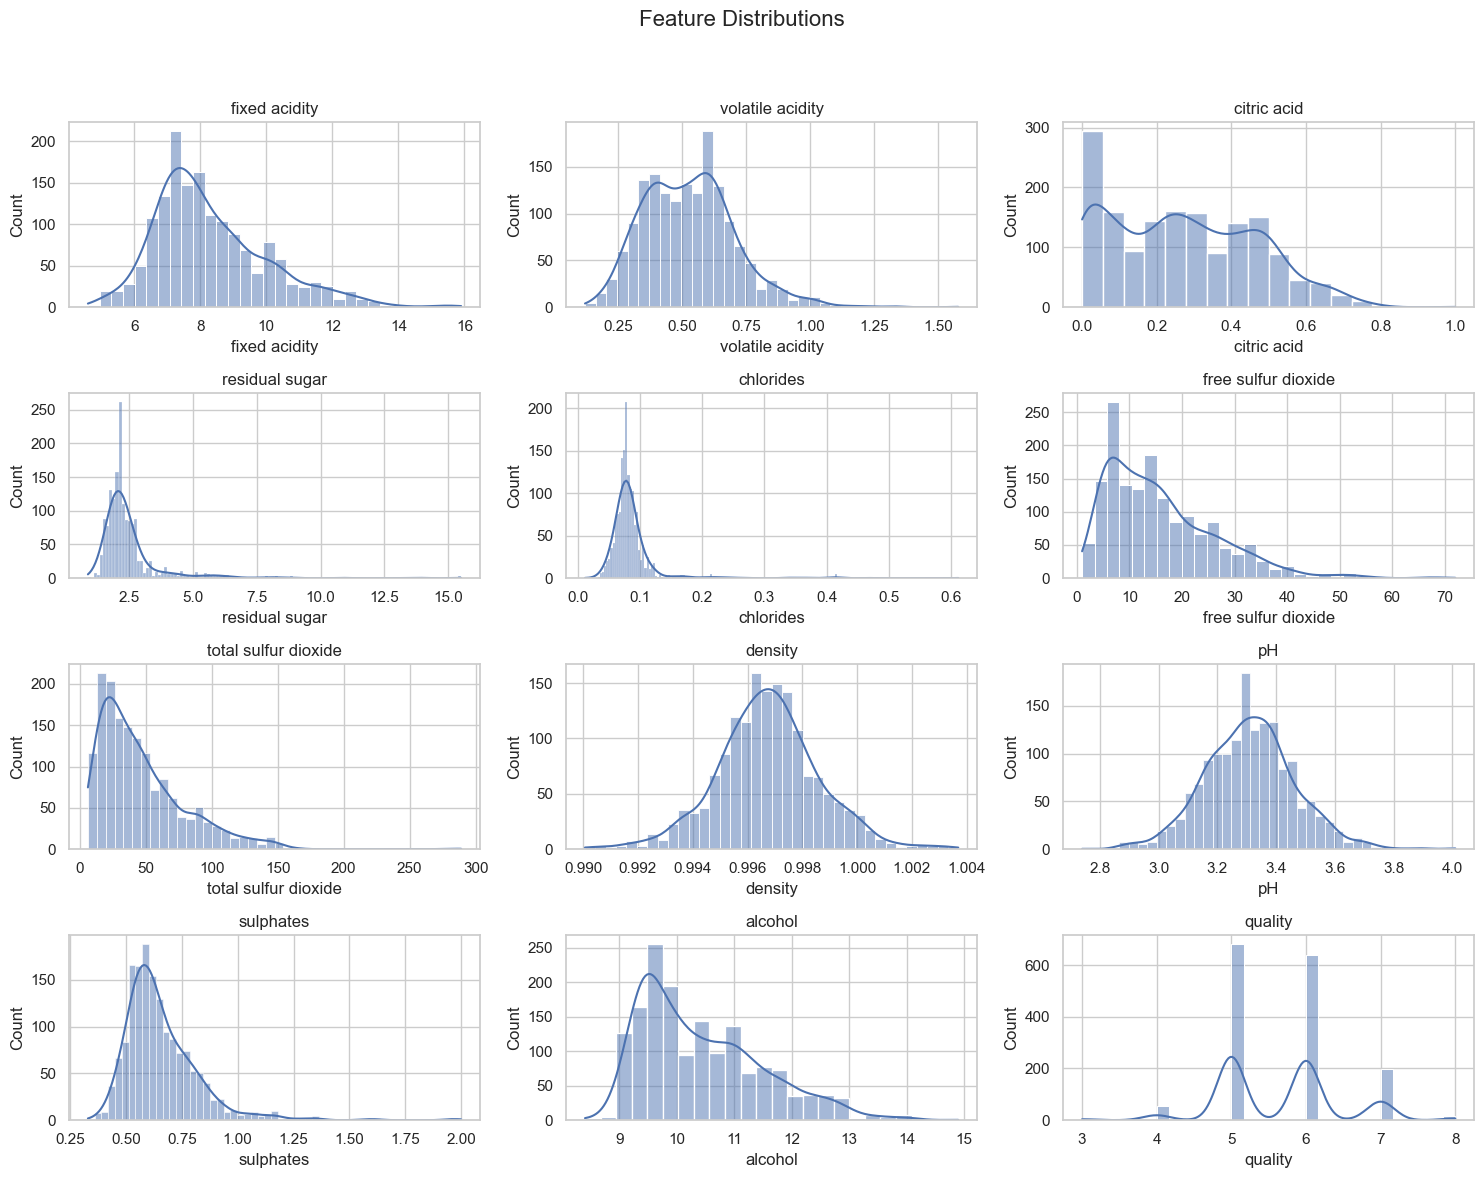

In [12]:
# Visualize distributions of each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle('Feature Distributions', fontsize=16)

for idx, feature in enumerate(wine_data.columns):
    sns.histplot(wine_data[feature], kde=True, ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


> ## 5) Correlation Analysis

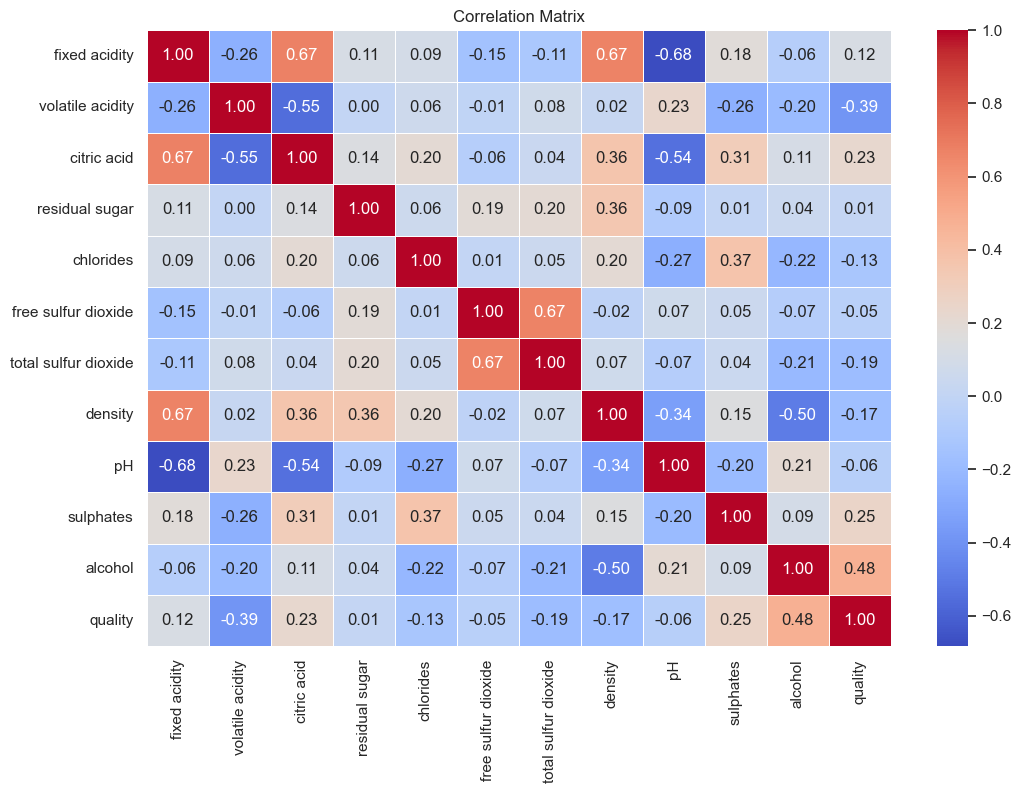

In [18]:
# Correlation matrix
correlation_matrix = wine_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


> ## 6) Feature Scaling

In [21]:
# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


> ## 7) Model training and Evaluation

Accuracy: 65.94%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



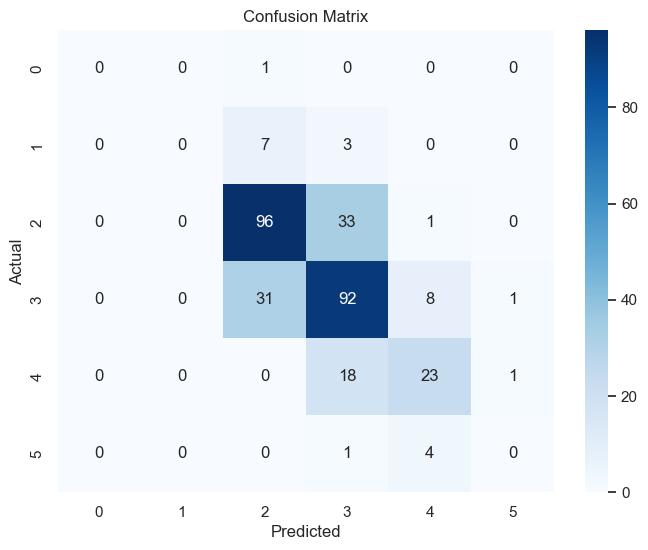

In [40]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Initialize a scaler for feature scaling
scaler = StandardScaler()

# Split the data into training and testing sets
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the performance
    model_performance[model_name] = accuracy
    
    # Print performance details
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred,))

# Compare the accuracy of all models
model_performance_sorted = sorted(model_performance.items(), key=lambda x: x[1], reverse=True)

# Display comparison results
print("\nModel Comparison:")
for model_name, accuracy in model_performance_sorted:
    print(f"{model_name}: {accuracy * 100:.2f}% accuracy")



Logistic Regression
Accuracy: 57.50%
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]

Decision Tree
Accuracy: 58.75%
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.63      0.69

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Accuracy: 67.19%
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.76      0.73       130
           6       0.64      0.70      0.67       132
           7       0.67      0.57      0.62        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.64      0.67      0.65       320

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 32 92  8  0]
 [ 0  0  1 16 24  1]
 [ 0  0  0  1  4  0]]

SVM
Accuracy: 60.31%
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70      

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\s

> ## Count Plot for Wine quality
This will basically show us the ratings of the distribution of wine quality in dataset

C:\Users\asus\AppData\Local\Temp\ipykernel_15772\159787623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


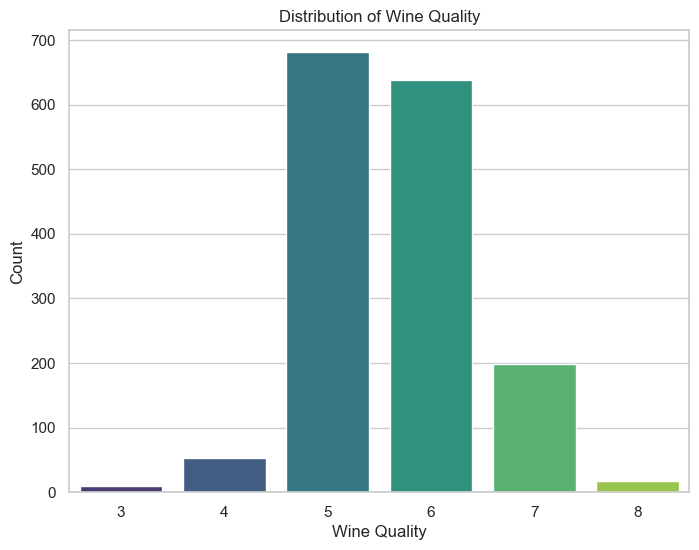

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()



> ## Feature vs Quality
This can highlight how specific features vary across different quality ratings
We will be doing comparison between alcohol and quality

C:\Users\asus\AppData\Local\Temp\ipykernel_15772\920887575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')


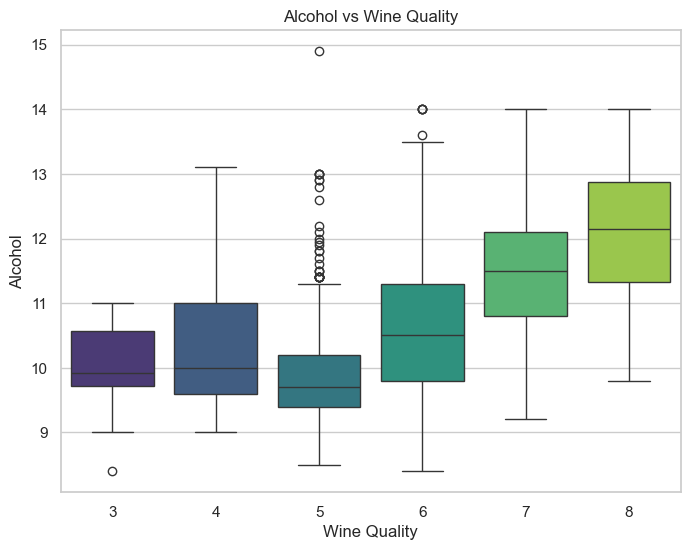

In [69]:
# Box plot for Alcohol vs Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')
plt.title('Alcohol vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()


For Ph vs quality

C:\Users\asus\AppData\Local\Temp\ipykernel_15772\4229231588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=wine_data, palette='viridis')


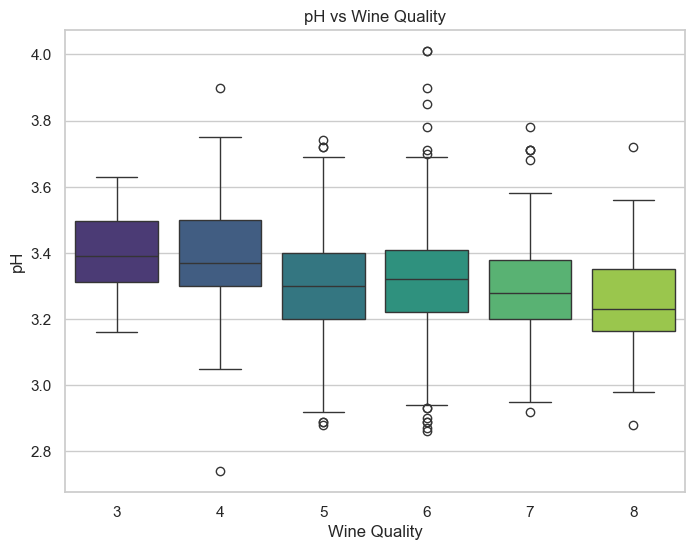

In [72]:
# Box plot for pH vs Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='pH', data=wine_data, palette='viridis')
plt.title('pH vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('pH')
plt.show()


> ## Feature importance using Random Forest


C:\Users\asus\AppData\Local\Temp\ipykernel_15772\3955263717.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


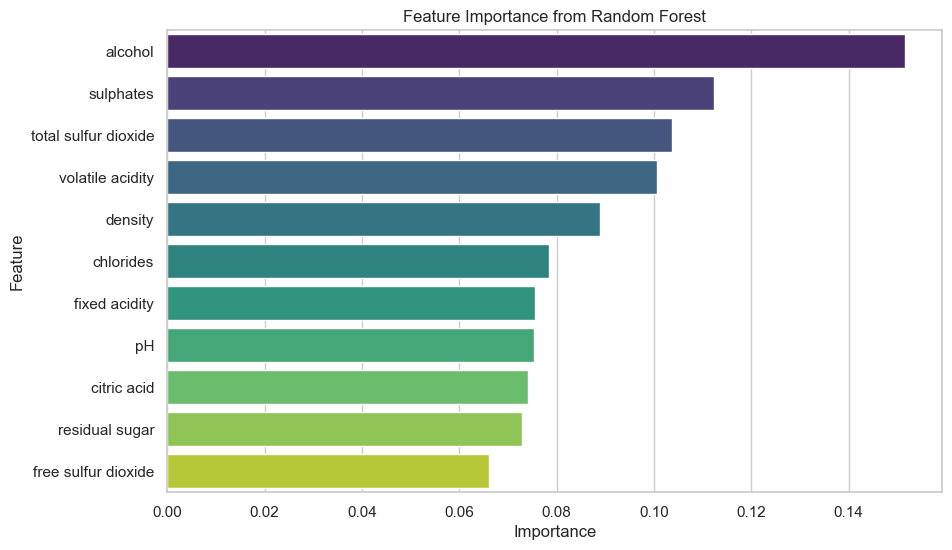

In [84]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a RandomForestClassifier
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


> ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -